In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw5.ipynb")

# CPSC 330 - Applied Machine Learning 

## Homework 5: Putting it all together 
### Associated lectures: All material till lecture 13 

**Due date: [Monday, Mar 10, 11:59 pm](https://github.com/UBC-CS/cpsc330-2024W2?tab=readme-ov-file#deliverable-due-dates-tentative)**

## Table of contents
0. [Submission instructions](#si)
1. [Understanding the problem](#1)
2. [Data splitting](#2)
3. [EDA](#3)
4. [Feature engineering](#4)
5. [Preprocessing and transformations](#5) 
6. [Baseline model](#6)
7. [Linear models](#7)
8. [Different models](#8)
9. [Feature selection](#9)
10. [Hyperparameter optimization](#10)
11. [Interpretation and feature importances](#11) 
12. [Results on the test set](#12)
13. [Summary of the results](#13)
14. [Your takeaway from the course](#15)

<div class="alert alert-info">

## Submission instructions
<hr>
rubric={points:4}

**You may work with a partner on this homework and submit your assignment as a group.** Below are some instructions on working as a group.  
- The maximum group size is 2. 
- Use group work as an opportunity to collaborate and learn new things from each other. 
- Be respectful to each other and make sure you understand all the concepts in the assignment well. 
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).
- If you would like to use late tokens for the homework, all group members must have the necessary late tokens available. Please note that the late tokens will be counted for all members of the group.   


Follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330-2024W2/blob/master/docs/homework_instructions.md). 

1. Before submitting the assignment, run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from "1" will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Follow the [CPSC 330 homework instructions](https://ubc-cs.github.io/cpsc330-2024W2/docs/homework_instructions.html), which include information on how to do your assignment and how to submit your assignment.
4. Upload your solution on Gradescope. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 
5. Make sure that the plots and output are rendered properly in your submitted file. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb so that the TAs can view your submission on Gradescope.


_Note: The assignments will get gradually more open-ended as we progress through the course. In many cases, there won't be a single correct solution. Sometimes you will have to make your own choices and your own decisions (for example, on what parameter values to use when they are not explicitly provided in the instructions). Use your own judgment in such cases and justify your choices, if necessary._

</div>

<!-- BEGIN QUESTION -->

## Imports

<div class="alert alert-warning">
    
Imports
    
</div>

_Points:_ 0

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from sklearn.dummy import DummyClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import (
    GridSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

<!-- END QUESTION -->

## Introduction <a name="in"></a>

In this homework you will be working on an open-ended mini-project, where you will put all the different things you have learned so far together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips
1. This mini-project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.


#### A final note
Finally, this style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "a few hours" (15-20 hours???) is a good guideline for this project . Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and I hope you enjoy it as well. 

<br><br>

<!-- BEGIN QUESTION -->

## 1. Pick your problem and explain the prediction problem <a name="1"></a>
<hr>
rubric={points:3}

In this mini project, you have the option to choose on which dataset you will be working on. The tasks you will need to carry on will be similar, independently of your choice.

### Option 1
You can choose to work on a classification problem of predicting whether a credit card client will default or not. 
For this problem, you will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns can be used as features. You may take some ideas and compare your results with [the associated research paper](https://www.sciencedirect.com/science/article/pii/S0957417407006719), which is available through [the UBC library](https://www.library.ubc.ca/). 


### Option 2
You can choose to work on a regression problem using a [dataset](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data) of New York City Airbnb listings from 2019. As usual, you'll need to start by downloading the dataset, then you will try to predict `reviews_per_month`, as a proxy for the popularity of the listing. Airbnb could use this sort of model to predict how popular future listings might be before they are posted, perhaps to help guide hosts create more appealing listings. In reality they might instead use something like vacancy rate or average rating as their target, but we do not have that available here.

> Note there is an updated version of this dataset with more features available [here](http://insideairbnb.com/). The features were are using in `listings.csv.gz` for the New York city datasets. You will also see some other files like `reviews.csv.gz`. For your own interest you may want to explore the expanded dataset and try your analysis there. However, please submit your results on the dataset obtained from Kaggle.


**Your tasks:**

1. Spend some time understanding the options and pick the one you find more interesting (it may help spending some time looking at the documentation available on Kaggle for each dataset).
2. After making your choice, focus on understanding the problem and what each feature means, again using the documentation on the dataset page on Kaggle. Write a few sentences on your initial thoughts on the problem and the dataset. 
3. Download the dataset and read it as a pandas dataframe. 

<div class="alert alert-warning">
    
Solution_1
    
</div>

_Points:_ 3

For this assignment, I am picking Option 2 - predicting the amount of reviews_per_month for NYC Airbnb listings. Some initial thoughts: features like neighbourhood and price are very likely to effect our model. Some neighbourhoods are more desirable than others, and will have more people looking at listings. Price is also a factor - my prediction is that if it's too high or too low, less people will be interested.

In [3]:
df = pd.read_csv("AB_NYC_2019.csv")
print(df.shape)
df.head()

(48895, 16)


id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 2. Data splitting <a name="2"></a>
<hr>
rubric={points:2}

**Your tasks:**

1. Split the data into train (70%) and test (30%) portions with `random_state=123`.

> If your computer cannot handle training on 70% training data, make the test split bigger.  

<div class="alert alert-warning">
    
Solution_2
    
</div>

_Points:_ 2

In [4]:
train_df, test_df = train_test_split(df, train_size=0.7, test_size=0.3, random_state=123)
summ = train_df.describe(include='all')
summ

id                 name       host_id host_name  \
count   3.422600e+04                34216  3.422600e+04     34209   
unique           NaN                33662           NaN      9201   
top              NaN  Home away from home           NaN     David   
freq             NaN                   14           NaN       292   
mean    1.893979e+07                  NaN  6.726273e+07       NaN   
std     1.101332e+07                  NaN  7.840511e+07       NaN   
min     2.539000e+03                  NaN  2.438000e+03       NaN   
25%     9.394482e+06                  NaN  7.721897e+06       NaN   
50%     1.954546e+07                  NaN  3.074526e+07       NaN   
75%     2.915085e+07                  NaN  1.068375e+08       NaN   
max     3.648561e+07                  NaN  2.743213e+08       NaN   

       neighbourhood_group neighbourhood      latitude     longitude  \
count                34226         34226  34226.000000  34226.000000   
unique                   5           218           NaN           NaN   
top              Manhattan  Williamsburg           NaN           NaN   
freq                 15176          2728           NaN           NaN   
mean                   NaN           NaN     40.729142    -73.952083   
std                    NaN           NaN      0.054531      0.046201   
min                    NaN           NaN     40.506410    -74.244420   
25%                    NaN           NaN     40.690193    -73.983030   
50%                    NaN           NaN     40.723240    -73.955550   
75%                    NaN           NaN     40.763287    -73.936270   
max                    NaN           NaN     40.912340    -73.712990   

              room_type         price  minimum_nights  number_of_reviews  \
count             34226  34226.000000    34226.000000       34226.000000   
unique                3           NaN             NaN                NaN   
top     Entire home/apt           NaN             NaN                NaN   
freq              17848           NaN             NaN                NaN   
mean                NaN    151.528399        7.094957          23.244814   
std                 NaN    236.628392       21.548290          44.573323   
min                 NaN      0.000000        1.000000           0.000000   
25%                 NaN     69.000000        1.000000           1.000000   
50%                 NaN    106.000000        3.000000           5.000000   
75%                 NaN    175.000000        5.000000          23.000000   
max                 NaN  10000.000000     1250.000000         629.000000   

       last_review  reviews_per_month  calculated_host_listings_count  \
count        27236       27236.000000                    34226.000000   
unique        1676                NaN                             NaN   
top     2019-06-23                NaN                             NaN   
freq           984                NaN                             NaN   
mean           NaN           1.369816                        7.042453   
std            NaN           1.700737                       32.590803   
min            NaN           0.010000                        1.000000   
25%            NaN           0.190000                        1.000000   
50%            NaN           0.710000                        1.000000   
75%            NaN           2.000000                        2.000000   
max            NaN          58.500000                      327.000000   

        availability_365  
count       34226.000000  
unique               NaN  
top                  NaN  
freq                 NaN  
mean          112.526004  
std           131.420031  
min             0.000000  
25%             0.000000  
50%            45.000000  
75%           225.750000  
max           365.000000

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 3. EDA <a name="3"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Perform exploratory data analysis on the train set.
2. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
3. Summarize your initial observations about the data. 
4. Pick appropriate metric/metrics for assessment. 

<div class="alert alert-warning">
    
Solution_3
    
</div>

_Points:_ 10

Since this is a regression problem, I will pick MSE and R-Squared as my assessment metrics.

In [5]:
train_df.sort_index()

id                                               name    host_id  \
0          2539                 Clean & quiet apt home by the park       2787   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !       4632   
3          3831                    Cozy Entire Floor of Brownstone       4869   
4          5022   Entire Apt: Spacious Studio/Loft by central park       7192   
6          5121                                    BlissArtsSpace!       7356   
...         ...                                                ...        ...   
48888  36484087  Spacious Room w/ Private Rooftop, Central loca...  274321313   
48889  36484363                                 QUIT PRIVATE HOUSE  107716952   
48891  36485057      Affordable room in Bushwick/East Williamsburg    6570630   
48892  36485431            Sunny Studio at Historical Neighborhood   23492952   
48893  36485609               43rd St. Time Square-cozy single bed   30985759   

           host_name neighbourhood_group       neighbourhood  latitude  \
0               John            Brooklyn          Kensington  40.64749   
2          Elisabeth           Manhattan              Harlem  40.80902   
3        LisaRoxanne            Brooklyn        Clinton Hill  40.68514   
4              Laura           Manhattan         East Harlem  40.79851   
6              Garon            Brooklyn  Bedford-Stuyvesant  40.68688   
...              ...                 ...                 ...       ...   
48888            Kat           Manhattan      Hell's Kitchen  40.76392   
48889        Michael              Queens             Jamaica  40.69137   
48891        Marisol            Brooklyn            Bushwick  40.70184   
48892  Ilgar & Aysel           Manhattan              Harlem  40.81475   
48893            Taz           Manhattan      Hell's Kitchen  40.75751   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
0      -73.97237     Private room    149               1                  9   
2      -73.94190     Private room    150               3                  0   
3      -73.95976  Entire home/apt     89               1                270   
4      -73.94399  Entire home/apt     80              10                  9   
6      -73.95596     Private room     60              45                 49   
...          ...              ...    ...             ...                ...   
48888  -73.99183     Private room    125               4                  0   
48889  -73.80844     Private room     65               1                  0   
48891  -73.93317     Private room     40               4                  0   
48892  -73.94867  Entire home/apt    115              10                  0   
48893  -73.99112      Shared room     55               1                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
0      2018-10-19               0.21                               6   
2             NaN                NaN                               1   
3      2019-07-05               4.64                               1   
4      2018-11-19               0.10                               1   
6      2017-10-05               0.40                               1   
...           ...                ...                             ...   
48888         NaN                NaN                               1   
48889         NaN                NaN                               2   
48891         NaN                NaN                               2   
48892         NaN                NaN                               1   
48893         NaN                NaN                               6   

       availability_365  
0                   365  
2                   365  
3                   194  
4                     0  
6                     0  
...                 ...  
48888                31  
48889               163  
48891                36  
48892                27  
48893                 2  

[34226 rows x 16 columns

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34226 entries, 36150 to 15725
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              34226 non-null  int64  
 1   name                            34216 non-null  object 
 2   host_id                         34226 non-null  int64  
 3   host_name                       34209 non-null  object 
 4   neighbourhood_group             34226 non-null  object 
 5   neighbourhood                   34226 non-null  object 
 6   latitude                        34226 non-null  float64
 7   longitude                       34226 non-null  float64
 8   room_type                       34226 non-null  object 
 9   price                           34226 non-null  int64  
 10  minimum_nights                  34226 non-null  int64  
 11  number_of_reviews               34226 non-null  int64  
 12  last_review                     2

We are missing values for name, host_name, last_review, and reviews_per_month. We will impute the non-targets later, while also dropping the rows with no target value.

In [7]:
missing_value_cols = ['name', 'host_name', 'last_review'] 

In [8]:
train_df.describe(include='all')

id                 name       host_id host_name  \
count   3.422600e+04                34216  3.422600e+04     34209   
unique           NaN                33662           NaN      9201   
top              NaN  Home away from home           NaN     David   
freq             NaN                   14           NaN       292   
mean    1.893979e+07                  NaN  6.726273e+07       NaN   
std     1.101332e+07                  NaN  7.840511e+07       NaN   
min     2.539000e+03                  NaN  2.438000e+03       NaN   
25%     9.394482e+06                  NaN  7.721897e+06       NaN   
50%     1.954546e+07                  NaN  3.074526e+07       NaN   
75%     2.915085e+07                  NaN  1.068375e+08       NaN   
max     3.648561e+07                  NaN  2.743213e+08       NaN   

       neighbourhood_group neighbourhood      latitude     longitude  \
count                34226         34226  34226.000000  34226.000000   
unique                   5           218           NaN           NaN   
top              Manhattan  Williamsburg           NaN           NaN   
freq                 15176          2728           NaN           NaN   
mean                   NaN           NaN     40.729142    -73.952083   
std                    NaN           NaN      0.054531      0.046201   
min                    NaN           NaN     40.506410    -74.244420   
25%                    NaN           NaN     40.690193    -73.983030   
50%                    NaN           NaN     40.723240    -73.955550   
75%                    NaN           NaN     40.763287    -73.936270   
max                    NaN           NaN     40.912340    -73.712990   

              room_type         price  minimum_nights  number_of_reviews  \
count             34226  34226.000000    34226.000000       34226.000000   
unique                3           NaN             NaN                NaN   
top     Entire home/apt           NaN             NaN                NaN   
freq              17848           NaN             NaN                NaN   
mean                NaN    151.528399        7.094957          23.244814   
std                 NaN    236.628392       21.548290          44.573323   
min                 NaN      0.000000        1.000000           0.000000   
25%                 NaN     69.000000        1.000000           1.000000   
50%                 NaN    106.000000        3.000000           5.000000   
75%                 NaN    175.000000        5.000000          23.000000   
max                 NaN  10000.000000     1250.000000         629.000000   

       last_review  reviews_per_month  calculated_host_listings_count  \
count        27236       27236.000000                    34226.000000   
unique        1676                NaN                             NaN   
top     2019-06-23                NaN                             NaN   
freq           984                NaN                             NaN   
mean           NaN           1.369816                        7.042453   
std            NaN           1.700737                       32.590803   
min            NaN           0.010000                        1.000000   
25%            NaN           0.190000                        1.000000   
50%            NaN           0.710000                        1.000000   
75%            NaN           2.000000                        2.000000   
max            NaN          58.500000                      327.000000   

        availability_365  
count       34226.000000  
unique               NaN  
top                  NaN  
freq                 NaN  
mean          112.526004  
std           131.420031  
min             0.000000  
25%             0.000000  
50%            45.000000  
75%           225.750000  
max           365.000000

The dataset shows that the `number_of_reviews` varies widely, with a mean of about 23 and a high standard deviation of 44, indicating that most listings have relatively few reviews, but some have a large number. The `price` column has a mean value of $151$, but a wide range, from $0$ to $10,000$, suggesting that the dataset includes both budget and luxury listings. The `availability_365` feature indicates that most listings are available for only part of the year (mean of 112 days), with a significant number available throughout the year (maximum of 365 days). The spread in `availability_365` suggests seasonal or varied hosting patterns.

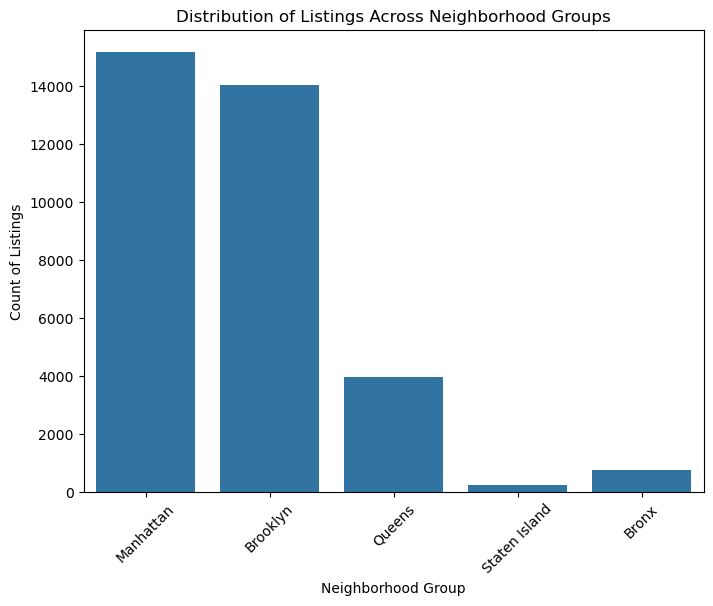

In [9]:
# Plot the neighbourhood_group distribution
plt.figure(figsize=(8, 6))
sns.countplot(x=train_df['neighbourhood_group'], data=train_df)
plt.title('Distribution of Listings Across Neighborhood Groups')
plt.xlabel('Neighborhood Group')
plt.ylabel('Count of Listings')
plt.xticks(rotation=45)
plt.show()

This bar graph shows that the data mostly shows listings from the `Manhattan` and `Brooklyn` neighbourhoods. 

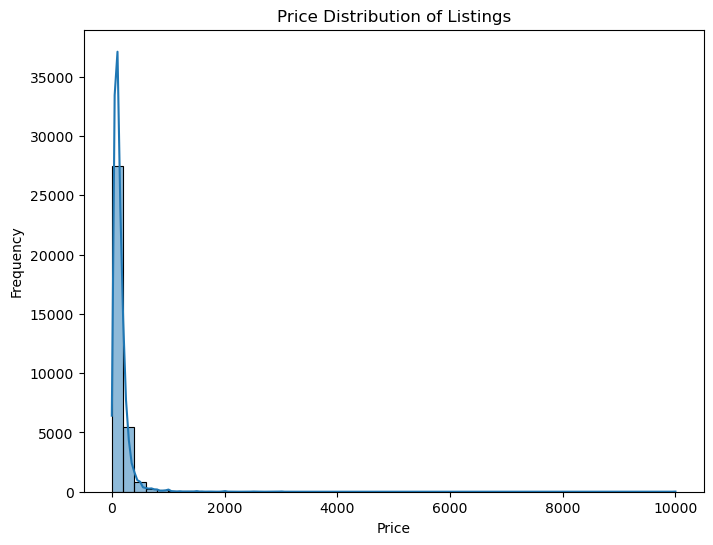

In [10]:
# Plot the price distribution
plt.figure(figsize=(8, 6))
sns.histplot(train_df['price'], bins=50, kde=True)
plt.title('Price Distribution of Listings')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

Most listing prices are $1000 or below. 

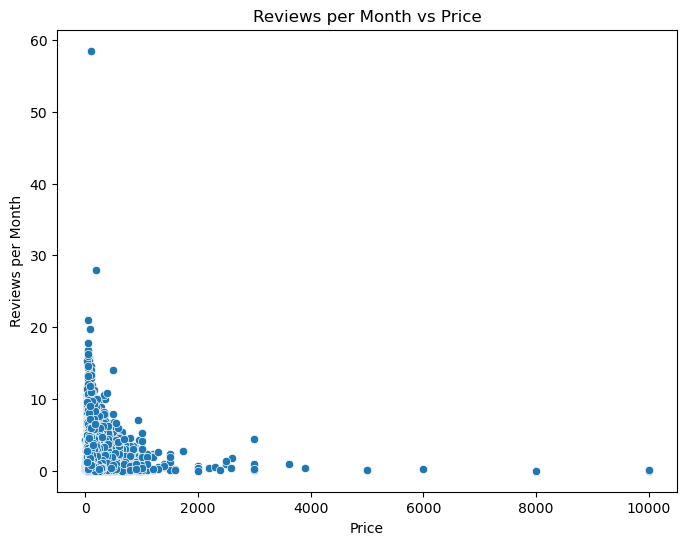

In [11]:
# Scatter plot of Reviews per Month vs Price
plt.figure(figsize=(8, 6))
sns.scatterplot(x=train_df['price'], y=train_df['reviews_per_month'])
plt.title('Reviews per Month vs Price')
plt.xlabel('Price')
plt.ylabel('Reviews per Month')
plt.show()

We see that there is some correlation with Price and Reviews per month, with most reviews being for listings with price < $2000.

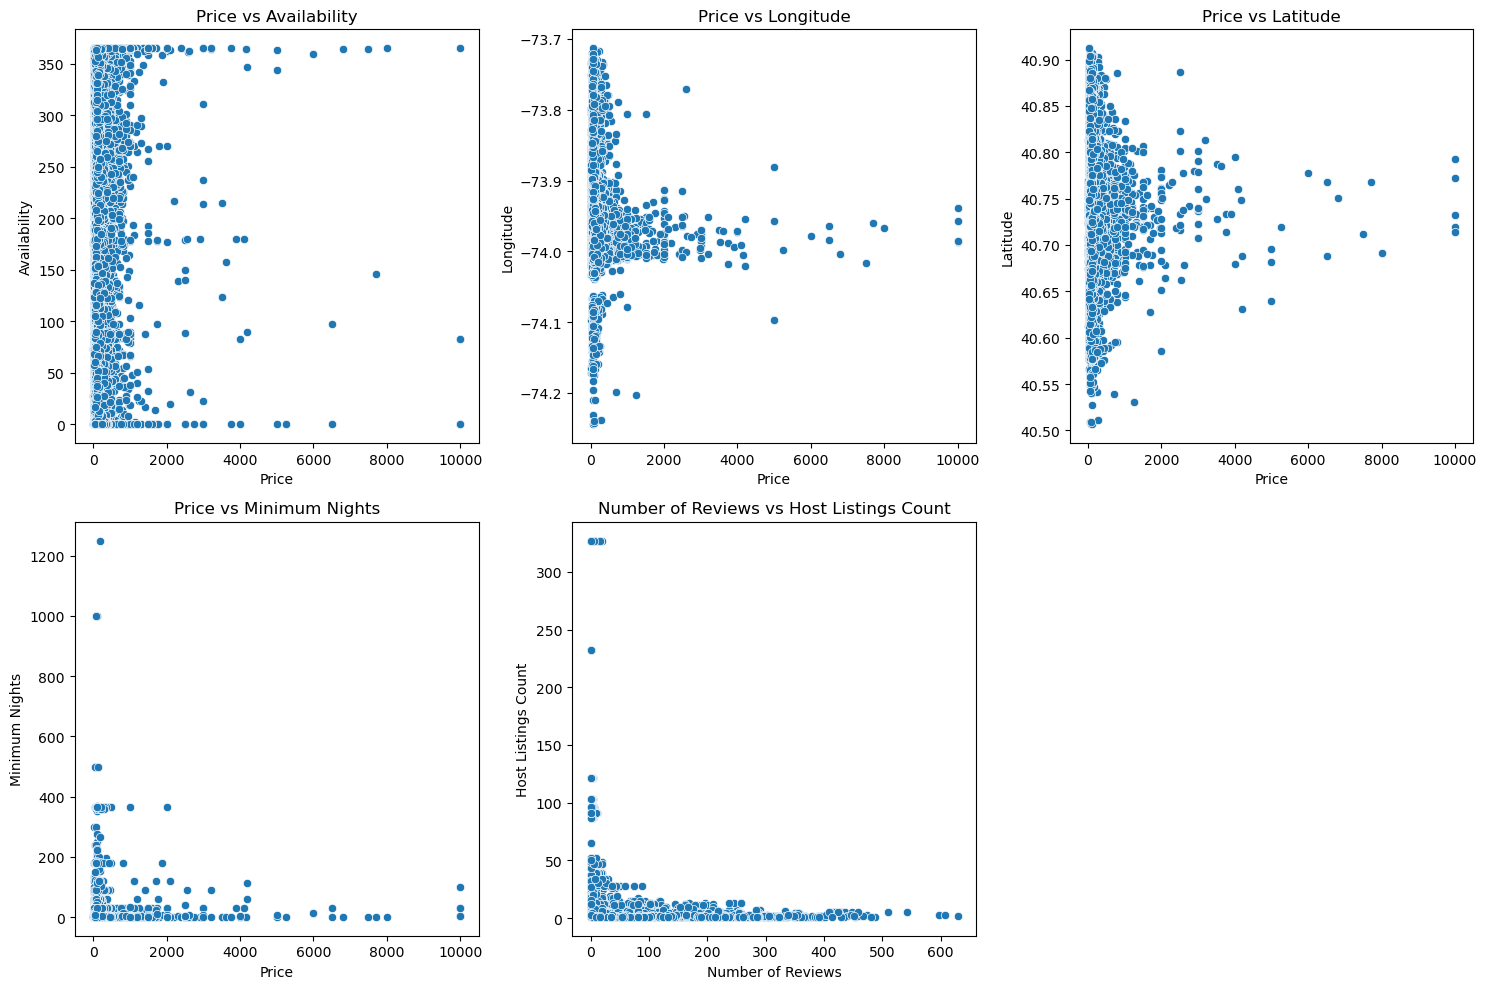

In [12]:
# List of numerical features
# numerical_features = ['price', 'number_of_reviews', 'availability_365', 'longitude', 'latitude', 'minimum_nights', 'calculated_host_listings_count']

# Set up the figure
plt.figure(figsize=(15, 10))

# Price vs Availability
plt.subplot(2, 3, 1)
sns.scatterplot(x=train_df['price'], y=train_df['availability_365'])
plt.title('Price vs Availability')
plt.xlabel('Price')
plt.ylabel('Availability')

# Price vs Longitude
plt.subplot(2, 3, 2)
sns.scatterplot(x=train_df['price'], y=train_df['longitude'])
plt.title('Price vs Longitude')
plt.xlabel('Price')
plt.ylabel('Longitude')

# Price vs Latitude
plt.subplot(2, 3, 3)
sns.scatterplot(x=train_df['price'], y=train_df['latitude'])
plt.title('Price vs Latitude')
plt.xlabel('Price')
plt.ylabel('Latitude')

# Price vs Minimum Nights
plt.subplot(2, 3, 4)
sns.scatterplot(x=train_df['price'], y=train_df['minimum_nights'])
plt.title('Price vs Minimum Nights')
plt.xlabel('Price')
plt.ylabel('Minimum Nights')

# Number of Reviews vs Calculated Host Listings Count
plt.subplot(2, 3, 5)
sns.scatterplot(x=train_df['number_of_reviews'], y=train_df['calculated_host_listings_count'])
plt.title('Number of Reviews vs Host Listings Count')
plt.xlabel('Number of Reviews')
plt.ylabel('Host Listings Count')

# Adjust layout
plt.tight_layout()
plt.show()


These plots are here just to better visualize possible relationships between the data features.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 4. Feature engineering <a name="4"></a>
<hr>
rubric={points:1}

**Your tasks:**

1. Carry out feature engineering. In other words, extract new features relevant for the problem and work with your new feature set in the following exercises. You may have to go back and forth between feature engineering and preprocessing. 

<div class="alert alert-warning">
    
Solution_4
    
</div>

_Points:_ 1

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 5. Preprocessing and transformations <a name="5"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 

<div class="alert alert-warning">
    
Solution_5
    
</div>

_Points:_ 10

| Feature | Transformation | Explanation |
| --- | ----------- | ----- |
| **id** | drop | Unique identifier that does not provide predictive value. |
| **name** | drop | Free-text field with high cardinality, which is unlikely to contribute meaningfully to the prediction. |
| **host_id** | drop | Unique to each host, not useful for predicting reviews per month. |
| **host_name** | drop | High-cardinality categorical feature with little predictive value. |
| **neighbourhood_group** | one-hot encoding | Categorical variable representing a broad area |
| **neighbourhood** | drop | Hyper-local feature, not needed in our model. Already captured by (lat,lng) data. |
| **latitude** | keep as is | Continuous numerical feature representing geographic position. |
| **longitude** | keep as is | Continuous numerical feature representing geographic position. |
| **room_type** | one-hot encoding | Categorical feature with a small number of categories |
| **price** | log transformation | Price has a highly skewed distribution; applying a log transformation reduces skewness and improves model performance. |
| **minimum_nights** | clip, log transformation | Outliers with extreme values need to be clipped; log transformation helps with skewness. |
| **number_of_reviews** | log transformation | Skewed distribution with some listings having an exceptionally high number of reviews. |
| **last_review** | convert to days since last review | Date feature converted into a numerical value representing recency of review. |
| **calculated_host_listings_count** | log transformation | Represents the number of listings a host manages; log transformation normalizes the distribution. |
| **availability_365** | keep as is | Continuous variable representing the number of available days in a year, which may directly impact review frequency. |


In [13]:
missing_value_cols

['name', 'host_name', 'last_review']

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.compose import make_column_transformer
import numpy as np
import pandas as pd

# Define custom transformation functions
log_transformer = FunctionTransformer(lambda x: np.log1p(x))  # log(1 + x) to handle zeros
clip_min_nights = FunctionTransformer(lambda x: np.clip(x, a_min=1, a_max=None))  # Clip minimum nights

# Define feature groups and transformations
drop_features = ["id", "name", "host_id", "host_name", "neighbourhood"]
one_hot_features = ["neighbourhood_group", "room_type"]
log_features = ["price", "number_of_reviews", "calculated_host_listings_count"]
clip_log_features = ["minimum_nights"]
date_feature = "last_review"
keep_as_is_features = ["latitude", "longitude", "availability_365"]
target = 'reviews_per_month'

# Drop rows with missing target
train_df_cleaned = train_df.dropna(subset=[target])
test_df_cleaned = test_df.dropna(subset=[target])

# Separate into test and train
X_train = train_df_cleaned.drop(columns=[target])
y_train = train_df_cleaned[target]

X_test = test_df_cleaned.drop(columns=[target])
y_test = test_df_cleaned[target]
X_train

id                                               name    host_id  \
20195  16162621        NEW! Exceptional 2BR/1BA Williamsburg Oasis  104781467   
18702  14807279  Renovated brownstone apt w/ private outdoor patio   43853650   
34780  27573483        Fort Greene two bedroom, quiet and peaceful    1180925   
23690  19154733      2 bedrooms Williamsburg loft - huge and sunny   42405567   
36152  28736839   Gorgeous Harlem loft w/15 ft ceilings, sleeps 10    3251620   
...         ...                                                ...        ...   
7763    5885201                   SUNNY ROOM A IN CHARMING AREA :)    4291007   
15377  12325045             IDEAL One bedroom apt by Central Park!   66501870   
17730  13915004                      Sunlit, spacious NY apartment    7177483   
28030  21897845                                          One room.  159769278   
15725  12711351                   Cozy Private Room w/ 1 Queen Bed   65809485   

            host_name neighbourhood_group       neighbourhood  latitude  \
20195         Russell            Brooklyn        Williamsburg  40.71306   
18702            Eric            Brooklyn  Bedford-Stuyvesant  40.68612   
34780            Mark            Brooklyn         Fort Greene  40.69488   
23690           Chris            Brooklyn        Williamsburg  40.71356   
36152               S           Manhattan              Harlem  40.81148   
...               ...                 ...                 ...       ...   
7763   Graham And Ben            Brooklyn  Bedford-Stuyvesant  40.69363   
15377     K Alexandra           Manhattan             Midtown  40.76016   
17730            Dani           Manhattan              Harlem  40.80380   
28030         Musieka               Bronx      Pelham Gardens  40.86706   
15725         Shirley              Queens            Flushing  40.74807   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
20195  -73.94856  Entire home/apt    199               3                  1   
18702  -73.95927  Entire home/apt    225               4                112   
34780  -73.97222  Entire home/apt    200               7                  1   
23690  -73.94372  Entire home/apt    225               4                  7   
36152  -73.95140  Entire home/apt    300               1                  1   
...          ...              ...    ...             ...                ...   
7763   -73.95980     Private room     95              30                 40   
15377  -73.96910  Entire home/apt    139               2                132   
17730  -73.95569  Entire home/apt    250               3                 10   
28030  -73.84674     Private room     40               2                 17   
15725  -73.82775     Private room     40               7                102   

      last_review  calculated_host_listings_count  availability_365  
20195  2016-12-11                               1                 0  
18702  2019-06-30                               1               136  
34780  2018-09-21                               3               163  
23690  2018-09-02                               2                 8  
36152  2018-10-10                               1                 0  
...           ...                             ...               ...  
7763   2019-06-01                              11               331  
15377  2019-06-30                               1               154  
17730  2019-01-01                               1                 0  
28030  2019-06-04                               1                17  
15725  2019-04-29                              12               105  

[27236 rows x 15 columns]

In [16]:
# Pipeline for one-hot encoding
one_hot_transformer = Pipeline([
    ("encoder", OneHotEncoder(dtype=int, handle_unknown="ignore"))
])

# Pipeline for log transformation
log_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("log_transform", log_transformer)
])

# Pipeline for minimum_nights (clipping + log transformation)
clip_log_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("clip_transform", clip_min_nights),
    ("log_transform", log_transformer)
])

date_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
])

# Define Column Transformer
preprocessor = make_column_transformer(
    (one_hot_transformer, one_hot_features),
    (log_pipeline, log_features),
    (clip_log_pipeline, clip_log_features),
    # (date_pipeline, [date_feature]),
    ("passthrough", keep_as_is_features),  # Keep certain numerical features as-is
    ("drop", drop_features)  # Drop irrelevant features
)

transformed_train_array = preprocessor.fit_transform(X_train)
transformed_test_array = preprocessor.transform(X_test) # no data leakage

# Convert sparse matrix to dense matrix and create a DataFrame
# If the result is sparse, use toarray() to convert it to a dense format
if isinstance(transformed_train_array, np.ndarray):
    transformed_train_df = pd.DataFrame(transformed_train_array)
elif hasattr(transformed_train_array, "toarray"):
    transformed_train_df = pd.DataFrame(transformed_train_array.toarray())

if isinstance(transformed_test_array, np.ndarray):
    transformed_test_df = pd.DataFrame(transformed_test_array)
elif hasattr(transformed_test_array, "toarray"):
    transformed_test_df = pd.DataFrame(transformed_test_array.toarray())

one_hot_feature_names = preprocessor.transformers_[0][1].named_steps['encoder'].get_feature_names_out(one_hot_features)
column_names = list(one_hot_feature_names) + log_features + clip_log_features + keep_as_is_features

transformed_train_df.columns = column_names
transformed_test_df.columns = column_names

In [17]:
# FINAL DATA AFTER PRE-PROCESSING
transformed_train_df

neighbourhood_group_Bronx  neighbourhood_group_Brooklyn  \
0                            0.0                           1.0   
1                            0.0                           1.0   
2                            0.0                           1.0   
3                            0.0                           1.0   
4                            0.0                           0.0   
...                          ...                           ...   
27231                        0.0                           1.0   
27232                        0.0                           0.0   
27233                        0.0                           0.0   
27234                        1.0                           0.0   
27235                        0.0                           0.0   

       neighbourhood_group_Manhattan  neighbourhood_group_Queens  \
0                                0.0                         0.0   
1                                0.0                         0.0   
2                                0.0                         0.0   
3                                0.0                         0.0   
4                                1.0                         0.0   
...                              ...                         ...   
27231                            0.0                         0.0   
27232                            1.0                         0.0   
27233                            1.0                         0.0   
27234                            0.0                         0.0   
27235                            0.0                         1.0   

       neighbourhood_group_Staten Island  room_type_Entire home/apt  \
0                                    0.0                        1.0   
1                                    0.0                        1.0   
2                                    0.0                        1.0   
3                                    0.0                        1.0   
4                                    0.0                        1.0   
...                                  ...                        ...   
27231                                0.0                        0.0   
27232                                0.0                        1.0   
27233                                0.0                        1.0   
27234                                0.0                        0.0   
27235                                0.0                        0.0   

       room_type_Private room  room_type_Shared room     price  \
0                         0.0                    0.0  5.298317   
1                         0.0                    0.0  5.420535   
2                         0.0                    0.0  5.303305   
3                         0.0                    0.0  5.420535   
4                         0.0                    0.0  5.707110   
...                       ...                    ...       ...   
27231                     1.0                    0.0  4.564348   
27232                     0.0                    0.0  4.941642   
27233                     0.0                    0.0  5.525453   
27234                     1.0                    0.0  3.713572   
27235                     1.0                    0.0  3.713572   

       number_of_reviews  calculated_host_listings_count  minimum_nights  \
0               0.693147                        0.693147        1.386294   
1               4.727388                        0.693147        1.609438   
2               0.693147                        1.386294        2.079442   
3               2.079442                        1.098612        1.609438   
4               0.693147                        0.693147        0.693147   
...                  ...                             ...             ...   
27231           3.713572                        2.484907        3.433987   
27232           4.890349                        0.693147        1.098612   
27233           2.397895                        0.693147        1.3

In [18]:
transformed_test_df

neighbourhood_group_Bronx  neighbourhood_group_Brooklyn  \
0                            0.0                           0.0   
1                            0.0                           1.0   
2                            0.0                           0.0   
3                            0.0                           1.0   
4                            0.0                           0.0   
...                          ...                           ...   
11602                        0.0                           0.0   
11603                        0.0                           0.0   
11604                        0.0                           1.0   
11605                        0.0                           0.0   
11606                        0.0                           0.0   

       neighbourhood_group_Manhattan  neighbourhood_group_Queens  \
0                                1.0                         0.0   
1                                0.0                         0.0   
2                                1.0                         0.0   
3                                0.0                         0.0   
4                                1.0                         0.0   
...                              ...                         ...   
11602                            1.0                         0.0   
11603                            1.0                         0.0   
11604                            0.0                         0.0   
11605                            1.0                         0.0   
11606                            1.0                         0.0   

       neighbourhood_group_Staten Island  room_type_Entire home/apt  \
0                                    0.0                        0.0   
1                                    0.0                        0.0   
2                                    0.0                        0.0   
3                                    0.0                        0.0   
4                                    0.0                        1.0   
...                                  ...                        ...   
11602                                0.0                        1.0   
11603                                0.0                        0.0   
11604                                0.0                        0.0   
11605                                0.0                        1.0   
11606                                0.0                        1.0   

       room_type_Private room  room_type_Shared room     price  \
0                         1.0                    0.0  4.454347   
1                         1.0                    0.0  4.025352   
2                         1.0                    0.0  4.605170   
3                         1.0                    0.0  4.330733   
4                         0.0                    0.0  5.669881   
...                       ...                    ...       ...   
11602                     0.0                    0.0  6.111467   
11603                     1.0                    0.0  4.564348   
11604                     1.0                    0.0  3.891820   
11605                     0.0                    0.0  5.525453   
11606                     0.0                    0.0  5.198497   

       number_of_reviews  calculated_host_listings_count  minimum_nights  \
0               4.912655                        0.693147        0.693147   
1               1.945910                        0.693147        1.791759   
2               5.638355                        0.693147        0.693147   
3               2.302585                        0.693147        1.098612   
4               5.198497                        0.693147        1.098612   
...                  ...                             ...             ...   
11602           3.637586                        1.609438        1.791759   
11603           1.791759                        1.609438        1.098612   
11604           1.791759                        0.693147        1.3

Compare this with our original df:

In [19]:
train_df.head()

id                                             name    host_id  \
36150  28736148           Cozy 1 Bedroom Apt in Hamilton Heights   43431867   
45223  34613254  Amazing One Bedroom at the Time Square Area/72B   48146336   
14316  11144496                New Spacious Master, Williamsburg   48819868   
1691     766814                    Adorable Midtown West Studio!    4022922   
20195  16162621      NEW! Exceptional 2BR/1BA Williamsburg Oasis  104781467   

      host_name neighbourhood_group       neighbourhood  latitude  longitude  \
36150     Tommy           Manhattan  Washington Heights  40.83256  -73.94440   
45223     Irina           Manhattan      Hell's Kitchen  40.76134  -73.99299   
14316      Nick            Brooklyn        Williamsburg  40.71119  -73.95097   
1691    Caitlin           Manhattan      Hell's Kitchen  40.75900  -73.99530   
20195   Russell            Brooklyn        Williamsburg  40.71306  -73.94856   

             room_type  price  minimum_nights  number_of_reviews last_review  \
36150  Entire home/apt     96               4                  0         NaN   
45223  Entire home/apt    150              30                  0         NaN   
14316     Private room    200               1                  0         NaN   
1691   Entire home/apt     95               1                  0         NaN   
20195  Entire home/apt    199               3                  1  2016-12-11   

       reviews_per_month  calculated_host_listings_count  availability_365  
36150                NaN                               1                17  
45223                NaN                              20               332  
14316                NaN                               1                 0  
1691                 NaN                               1                 0  
20195               0.03                               1                 0

In [20]:
# First 100 rows from X and y because my computer is slow
sampled_train_df = transformed_train_df.iloc[:100]
sampled_y_train = y_train.iloc[:100]

sampled_test_df = transformed_test_df.iloc[:100]
sampled_y_test = y_test.iloc[:100]

In [21]:
sampled_train_df.describe()

neighbourhood_group_Bronx  neighbourhood_group_Brooklyn  \
count                 100.000000                    100.000000   
mean                    0.040000                      0.410000   
std                     0.196946                      0.494311   
min                     0.000000                      0.000000   
25%                     0.000000                      0.000000   
50%                     0.000000                      0.000000   
75%                     0.000000                      1.000000   
max                     1.000000                      1.000000   

       neighbourhood_group_Manhattan  neighbourhood_group_Queens  \
count                      100.00000                  100.000000   
mean                         0.43000                    0.110000   
std                          0.49757                    0.314466   
min                          0.00000                    0.000000   
25%                          0.00000                    0.000000   
50%                          0.00000                    0.000000   
75%                          1.00000                    0.000000   
max                          1.00000                    1.000000   

       neighbourhood_group_Staten Island  room_type_Entire home/apt  \
count                             100.00                     100.00   
mean                                0.01                       0.55   
std                                 0.10                       0.50   
min                                 0.00                       0.00   
25%                                 0.00                       0.00   
50%                                 0.00                       1.00   
75%                                 0.00                       1.00   
max                                 1.00                       1.00   

       room_type_Private room  room_type_Shared room       price  \
count              100.000000                 100.00  100.000000   
mean                 0.440000                   0.01    4.707256   
std                  0.498888                   0.10    0.698590   
min                  0.000000                   0.00    3.401197   
25%                  0.000000                   0.00    4.320665   
50%                  0.000000                   0.00    4.658700   
75%                  1.000000                   0.00    5.170484   
max                  1.000000                   1.00    6.857514   

       number_of_reviews  calculated_host_listings_count  minimum_nights  \
count         100.000000                      100.000000      100.000000   
mean            2.526261                        1.068348        1.446728   
std             1.353665                        0.729343        0.823348   
min             0.693147                        0.693147        0.693147   
25%             1.386294                        0.693147        0.693147   
50%             2.441401                        0.693147        1.386294   
75%             3.417332                        1.098612        1.609438   
max             5.929589                        5.793014        3.806662   

         latitude   longitude  availability_365  
count  100.000000  100.000000        100.000000  
mean    40.733193  -73.950188        115.570000  
std      0.058002    0.042085        127.792545  
min     40.617070  -74.073560          0.000000  
25%     40.691915  -73.979260          0.000000  
50%     40.720280  -73.951855         64.500000  
75%     40.767730  -73.936140        209.250000  
max     40.879010  -73.779570        365.000000

In [22]:
transformed_train_df.describe()

neighbourhood_group_Bronx  neighbourhood_group_Brooklyn  \
count               27236.000000                  27236.000000   
mean                    0.022874                      0.422492   
std                     0.149505                      0.493965   
min                     0.000000                      0.000000   
25%                     0.000000                      0.000000   
50%                     0.000000                      0.000000   
75%                     0.000000                      1.000000   
max                     1.000000                      1.000000   

       neighbourhood_group_Manhattan  neighbourhood_group_Queens  \
count                   27236.000000                27236.000000   
mean                        0.428734                    0.118116   
std                         0.494904                    0.322751   
min                         0.000000                    0.000000   
25%                         0.000000                    0.000000   
50%                         0.000000                    0.000000   
75%                         1.000000                    0.000000   
max                         1.000000                    1.000000   

       neighbourhood_group_Staten Island  room_type_Entire home/apt  \
count                       27236.000000               27236.000000   
mean                            0.007784                   0.525187   
std                             0.087884                   0.499374   
min                             0.000000                   0.000000   
25%                             0.000000                   0.000000   
50%                             0.000000                   1.000000   
75%                             0.000000                   1.000000   
max                             1.000000                   1.000000   

       room_type_Private room  room_type_Shared room         price  \
count            27236.000000           27236.000000  27236.000000   
mean                 0.453077               0.021736      4.706068   
std                  0.497802               0.145823      0.655989   
min                  0.000000               0.000000      0.000000   
25%                  0.000000               0.000000      4.248495   
50%                  0.000000               0.000000      4.624973   
75%                  1.000000               0.000000      5.141664   
max                  1.000000               1.000000      9.210440   

       number_of_reviews  calculated_host_listings_count  minimum_nights  \
count       27236.000000                    27236.000000    27236.000000   
mean            2.506349                        1.039594        1.429225   
std             1.333553                        0.731904        0.790422   
min             0.693147                        0.693147        0.693147   
25%             1.386294                        0.693147        0.693147   
50%             2.302585                        0.693147        1.098612   
75%             3.526361                        1.098612        1.609438   
max             6.445720                        5.793014        7.131699   

           latitude     longitude  availability_365  
count  27236.000000  27236.000000      27236.000000  
mean      40.728176    -73.951110        114.728668  
std        0.054925      0.046843        129.438964  
min       40.506410    -74.244420          0.000000  
25%       40.688700    -73.982600          0.000000  
50%       40.721740    -73.954730         55.000000  
75%       40.763000    -73.935075        229.000000  
max       40.912340    -73.712990        365.000000

In [23]:
sampled_y_train.describe()

count    100.000000
mean       1.448100
std        1.805745
min        0.020000
25%        0.210000
50%        0.640000
75%        1.965000
max        8.270000
Name: reviews_per_month, dtype: float64

In [24]:
y_train.describe()

count    27236.000000
mean         1.369816
std          1.700737
min          0.010000
25%          0.190000
50%          0.710000
75%          2.000000
max         58.500000
Name: reviews_per_month, dtype: float64

Seems like the first 100 rows are a good enough representation of the entire training set, with similiar means, quartiles, standard deviations. The same is true for the test set.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 6. Baseline model <a name="6"></a>
<hr>
rubric={points:2}

**Your tasks:**
1. Try `scikit-learn`'s baseline model and report results.

<div class="alert alert-warning">
    
Solution_6
    
</div>

_Points:_ 2

In [25]:
# Initialize and train the baseline model
dummy = DummyRegressor()  # Predicts the mean of training targets
dummy.fit(sampled_train_df, sampled_y_train)

# Make predictions
y_pred = dummy.predict(sampled_test_df)

# Evaluate performance
mse = mean_squared_error(sampled_y_test, y_pred)
r2 = r2_score(sampled_y_test, y_pred)

# Print results
print(f"Baseline Model (Dummy Regressor) Results:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared Score (R²): {r2:.8f}")

Baseline Model (Dummy Regressor) Results:
Mean Squared Error (MSE): 2.0575
R-squared Score (R²): -0.00234637


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 7. Linear models <a name="7"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Try a linear model as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the complexity hyperparameter. 
3. Report cross-validation scores along with standard deviation. 
4. Summarize your results.

<div class="alert alert-warning">
    
Solution_7
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [26]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
import numpy as np

# default alpha=1.0
ridge = Ridge()

# Perform 5-fold cross-validation
# cv = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(ridge, sampled_train_df, sampled_y_train, cv=5, scoring='r2')

# Compute mean and standard deviation of R² scores
ridge_mean_r2 = np.mean(scores)
ridge_std_r2 = np.std(scores)

ridge_mean_r2, ridge_std_r2

(-0.013352957112767471, 0.5074338562576569)

After cross-validation, the R² for using Ridge was -0.0133 with a standard deviation of 0.507, which is a slight improvement over the dummy model. The standard deviation also shows the model's performance is highly variable across different folds, indicating that Ridge regression may not generalize well to unseen data. This suggests that the model is either underfitting the data or that the chosen feature set may not be optimal. Further improvements, such as feature selection, hyperparameter tuning, or trying non-linear models, could help stabilize and improve performance.

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
import numpy as np

# Define the hyperparameter grid
param_grid = {'alpha': np.logspace(-4, 2, 50)}  # Exploring α from 0.0001 to 100

# Ridge Regression Hyperparameter Tuning
ridge = Ridge()
ridge_cv = GridSearchCV(ridge, param_grid, cv=5, scoring='r2', n_jobs=-1)
ridge_cv.fit(sampled_train_df, sampled_y_train)

# Extract best parameters and score
best_alpha = ridge_cv.best_params_['alpha']
best_r2 = ridge_cv.best_score_

# Extract mean cross-validation score across all tested alphas
mean_cv_score = np.mean(ridge_cv.cv_results_['mean_test_score'])

# Print results
print(f"Best Ridge alpha: {best_alpha}, R²: {best_r2:.8f}")

Best Ridge alpha: 75.43120063354607, R²: 0.20713347


Ridge performed much better after hyperparameter tuning, with an R² value of 0.207. This suggests that the tuning alpha (adjusting the regularization strength) really affected the model’s performance. 

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 8. Different models <a name="8"></a>
<hr>
rubric={points:12}

**Your tasks:**
1. Try at least 3 other models aside from a linear model. One of these models should be a tree-based ensemble model. 
2. Summarize your results in terms of overfitting/underfitting and fit and score times. Can you beat a linear model? 

<div class="alert alert-warning">
    
Solution_8
    
</div>

_Points:_ 12

_Type your answer here, replacing this text._

In [28]:
import time
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

# List of models to try
models = {
    'Random Forest': RandomForestRegressor(random_state=42, n_jobs=-1),
    'SVR': SVR(),
    'KNN': KNeighborsRegressor()
}

# Dictionary to store results
results = {}

# Try each model
for model_name, model in models.items():
    start_time = time.time()  # Start timer
    scores = cross_val_score(model, sampled_train_df, sampled_y_train, cv=5, scoring='r2', n_jobs=-1)
    fit_time = time.time() - start_time  # Stop timer

    # Store results
    results[model_name] = {
        'mean_score': np.mean(scores),
        'std_score': np.std(scores),
        'fit_time': fit_time,
    }

# Print results for each model
for model_name, result in results.items():
    print(f"{model_name}:")
    print(f"  Mean R²: {result['mean_score']:.4f}")
    print(f"  Std. Dev. of R²: {result['std_score']:.4f}")
    print(f"  Fit Time: {result['fit_time']:.4f} seconds")
    print()


Random Forest:
  Mean R²: 0.1714
  Std. Dev. of R²: 0.3962
  Fit Time: 0.1935 seconds

SVR:
  Mean R²: -0.2122
  Std. Dev. of R²: 0.2048
  Fit Time: 0.0140 seconds

KNN:
  Mean R²: -0.2794
  Std. Dev. of R²: 0.4654
  Fit Time: 0.0263 seconds



The Random Forest model shows some promise with its ability to explain part of the variance in the data, but it suffers from high variability across different cross-validation folds (large std), indicating potential overfitting. While it performs reasonably well, its instability suggests that more tuning or adjustments may be needed. On the other hand, both the SVR and KNN models show consistently poor performance, indicating underfitting. These models fail to capture the relationships in the data, and their instability across folds further reinforces their inability to generalize. All three models are fast to fit, but their weak performance overall suggests that a different approach or further refinement is required to improve results.

In [29]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 9. Feature selection <a name="9"></a>
<hr>
rubric={points:2}

**Your tasks:**

Make some attempts to select relevant features. You may try `RFECV` or forward selection for this. Do the results improve with feature selection? Summarize your results. If you see improvements in the results, keep feature selection in your pipeline. If not, you may abandon it in the next exercises. 

<div class="alert alert-warning">
    
Solution_9
    
</div>

_Points:_ 2

_Type your answer here, replacing this text._

In [30]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Initialize the model (Ridge for example)
model = Ridge(alpha=75.43120063354607)

# Create RFECV object
selector = RFECV(estimator=model, step=1, cv=5)  # Use 5-fold cross-validation

# Fit RFECV to the data
selector.fit(sampled_train_df, sampled_y_train)

# Get the results
selected_features = selector.support_
print(f"Selected Features: {selected_features}")
print(f"Optimal number of features: {selector.n_features_}")

# Get the cross-validation score after feature selection
rfecv_score = cross_val_score(model, sampled_train_df.iloc[:, selected_features], sampled_y_train, cv=5)
print(f"Mean R² score after RFECV: {rfecv_score.mean():.4f}, Std. Dev: {rfecv_score.std():.4f}")

Selected Features: [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True]
Optimal number of features: 15
Mean R² score after RFECV: 0.2071, Std. Dev: 0.2092


After applying Recursive Feature Elimination with Cross-Validation (RFECV) to the Ridge model with a tuned alpha of **75.43**, all **15 features** were retained, meaning that feature elimination did not improve the model’s performance. This suggests that Ridge’s built-in regularization was already effectively managing feature importance, making additional selection unnecessary. The **mean R² score remained at 0.2071**, the same as before RFECV, indicating that the model's ability to explain variance in the target variable did not change. Additionally, the **standard deviation of 0.2092** suggests that the model’s performance varies significantly across different cross-validation folds, highlighting potential sensitivity to different subsets of training data. Overall, these results imply that feature selection did not enhance the Ridge model’s predictive power, and further improvements may require different approaches such as engineering new features or exploring alternative models.

In [31]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Initialize the model with tuned hyperparameters (or use default)
rf_model = RandomForestRegressor(n_jobs=-1, random_state=42)

# Create RFECV object
selector = RFECV(estimator=rf_model, step=2, cv=5, n_jobs=-1, verbose=2)  # Using step=2 speeds up selection

# Fit RFECV to the data
selector.fit(sampled_train_df, sampled_y_train)

# Get the results
selected_features = selector.support_
print(f"Selected Features: {selected_features}")
print(f"Optimal number of features: {selector.n_features_}")

# Get the cross-validation score after feature selection
rfecv_score = cross_val_score(rf_model, sampled_train_df.iloc[:, selected_features], sampled_y_train, cv=5, n_jobs=-1)
print(f"Mean R² score after RFECV: {rfecv_score.mean():.4f}, Std. Dev: {rfecv_score.std():.4f}")


Fitting estimator with 15 features.
Fitting estimator with 13 features.
Selected Features: [ True  True False  True False False  True False  True  True  True  True
  True  True  True]
Optimal number of features: 11
Mean R² score after RFECV: 0.1883, Std. Dev: 0.3720


After applying Recursive Feature Elimination with Cross-Validation (RFECV) to the Ridge model, the optimal number of features selected was **11**, down from 15 initially. This indicates that feature selection effectively identified a smaller, more relevant set of features for the model. The **mean R² score improved slightly to 0.1883** from 0.17 before RFECV, suggesting that reducing the number of features may have enhanced the model’s ability to explain variance in the target variable. However, the **standard deviation of 0.3720** is relatively high, indicating considerable variability in performance across different cross-validation folds. This suggests that while feature selection showed some benefit, the model might still be sensitive to variations in the data, and further tuning or model adjustments could potentially yield better results.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 10. Hyperparameter optimization <a name="10"></a>
<hr>
rubric={points:10}

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. In at least one case you should be optimizing multiple hyperparameters for a single model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize) 

<div class="alert alert-warning">
    
Solution_10
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor


# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Initialize RandomForestRegressor
rf_model = models['Random Forest']

# Initialize GridSearchCV with Random Forest
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, 
                              cv=5, n_jobs=-1, scoring='r2')

# Fit the model to the sampled data
grid_search_rf.fit(sampled_train_df, sampled_y_train)

# Get the best parameters and score
print(f"Best Parameters for Random Forest: {grid_search_rf.best_params_}")
print(f"Best R² score for Random Forest: {grid_search_rf.best_score_}")


Best Parameters for Random Forest: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best R² score for Random Forest: 0.3169090307099386


After hyperparameter tuning of the Random Forest model, the best parameters found were a max depth of 10, max features set to 'sqrt', min samples leaf of 1, min samples split of 5, and 100 estimators. The resulting best R² score of 0.3169 indicates a moderate improvement in model performance compared to earlier results. This suggests that the tuned model is better at capturing the relationship between the features and the target variable, though the score still leaves room for improvement. The choice of max depth of 10 helps prevent overfitting by limiting the depth of the trees, and the 'sqrt' setting for max features strikes a balance between computational efficiency and model accuracy. The relatively low values for min samples split and min samples leaf indicate that the model was allowed to create deeper splits at earlier stages, which can be effective when tuned properly. 

In [33]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
import numpy as np

# Define the parameter grid for KNN
param_dist_knn = {
    'n_neighbors': np.arange(3, 20),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'chebyshev']
}

# Initialize KNeighborsRegressor
knn_model = KNeighborsRegressor()

# Initialize RandomizedSearchCV with KNN
random_search_knn = RandomizedSearchCV(estimator=knn_model, param_distributions=param_dist_knn, 
                                       n_iter=50, cv=5, n_jobs=-1, scoring='r2')

# Fit the model to the sampled data
random_search_knn.fit(sampled_train_df, sampled_y_train)

# Get the best parameters and score
print(f"Best Parameters for KNN: {random_search_knn.best_params_}")
print(f"Best R² score for KNN: {random_search_knn.best_score_}")


Best Parameters for KNN: {'weights': 'distance', 'n_neighbors': 19, 'metric': 'manhattan'}
Best R² score for KNN: -0.038594105837124235


In [34]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR
import numpy as np

# Define the parameter grid for SVR
param_dist_svr = {
    'C': np.logspace(-3, 2, 6),
    'epsilon': np.linspace(0.01, 0.2, 5),
    'kernel': ['linear', 'poly', 'rbf']
}

# Initialize SVR
svr_model = SVR()

# Initialize RandomizedSearchCV with SVR
random_search_svr = RandomizedSearchCV(estimator=svr_model, param_distributions=param_dist_svr, 
                                       n_iter=50, cv=5, n_jobs=-1, scoring='r2')

# Fit the model to the sampled data
random_search_svr.fit(sampled_train_df, sampled_y_train)

# Get the best parameters and score
print(f"Best Parameters for SVR: {random_search_svr.best_params_}")
print(f"Best R² score for SVR: {random_search_svr.best_score_}")


Best Parameters for SVR: {'kernel': 'linear', 'epsilon': 0.2, 'C': 0.1}
Best R² score for SVR: 0.24773189111760133


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 11. Interpretation and feature importances <a name="1"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Use the methods we saw in class (e.g., `shap`) (or any other methods of your choice) to examine the most important features of one of the non-linear models. 
2. Summarize your observations. 

<div class="alert alert-warning">
    
Solution_11
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [35]:
best_params = {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}

# Initialize the model with the optimal hyperparameters
rf_model = RandomForestRegressor(**best_params)

# Fit the model
rf_model.fit(sampled_train_df, sampled_y_train)

RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_split=5)

In [36]:
rf_importances = rf_model.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': sampled_train_df.columns,
    'Importance': rf_importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

                              Feature  Importance
9                   number_of_reviews    0.299310
14                   availability_365    0.150045
8                               price    0.116958
11                     minimum_nights    0.111441
12                           latitude    0.102255
13                          longitude    0.090721
10     calculated_host_listings_count    0.026081
0           neighbourhood_group_Bronx    0.023218
6              room_type_Private room    0.020500
3          neighbourhood_group_Queens    0.019446
5           room_type_Entire home/apt    0.017519
2       neighbourhood_group_Manhattan    0.011040
1        neighbourhood_group_Brooklyn    0.010350
4   neighbourhood_group_Staten Island    0.000856
7               room_type_Shared room    0.000259


Looking at the feature importances, it is clear that some features have a much higher impact on the model's predictions than others. The most important feature is number_of_reviews, which contributes 0.299310 to the model's decision-making process, indicating that the number of reviews plays a substantial role in predicting the target variable. Following this, availability_365 (0.150045) and price (0.116958) also contribute significantly to the model's accuracy, with availability being an indicator of how often a listing is available and price affecting the overall attractiveness of the listing.

Other important features include minimum_nights (0.111441), latitude (0.102255), and longitude (0.090721), which suggest that location-related variables also have a considerable impact. These geographical features, along with calculated_host_listings_count (0.026081), are informative in predicting the target, possibly reflecting a relationship between the number of listings by a host and the listing characteristics.

On the lower end of the importance scale, we see features such as neighbourhood_group_Staten Island (0.000856) and room_type_Shared room (0.000259), which have minimal influence on the model's predictions. This highlights that some features, despite being part of the dataset, have little or no relevance in determining the outcome and might be candidates for removal in future iterations of the model.

In summary, number_of_reviews, availability_365, and price are the primary drivers of the model, while many neighborhood-related and room type features contribute much less to the overall predictive power.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 12. Results on the test set <a name="12"></a>
<hr>

rubric={points:10}

**Your tasks:**

1. Try your best performing model on the test data and report test scores. 
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias? 
3. Take one or two test predictions and explain these individual predictions (e.g., with SHAP force plots).  

<div class="alert alert-warning">
    
Solution_12
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [39]:
# Assuming 'best_rf_model' is the model you trained with optimal hyperparameters

test_score = rf_model.score(sampled_test_df, sampled_y_test)  # R² score on test data
print(f"Test R² score: {test_score:.4f}")

Test R² score: 0.4887
Fitting estimator with 15 features.
Fitting estimator with 13 features.
Fitting estimator with 11 features.
Fitting estimator with 9 features.
Fitting estimator with 7 features.
Fitting estimator with 5 features.
Fitting estimator with 3 features.


The test R² score of 0.4887, which is higher than the best R² score of 0.3169 obtained during training, suggests that the model may be performing better on the unseen test data than it did during cross-validation. One possible explanation is that the model may have been slightly overfit during training. Overfitting can occur if the model was too closely aligned with the training and validation data, making it struggle to generalize during cross-validation. As a result, the model could have performed better on the test set, which may differ more from the training data. 

Another possibility is that the cross-validation scores were too optimistic. If the data splits in cross-validation happened to be more similar to each other, the validation scores might not have been reflective of the model's ability to generalize, leading to a potential bias. 

Lastly, random variation could also play a role. If the test data happened to be particularly well-suited for the model, it could result in a higher-than-expected test score. While the higher test R² score is encouraging, it's important to recognize that the model may have been over-optimized during hyperparameter tuning, which could have led to overfitting on the training/validation data. To ensure the robustness of these results, we should consider running additional tests like repeated k-fold cross-validation and using an out-of-sample validation set. 

/opt/miniconda3/envs/cpsc330/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


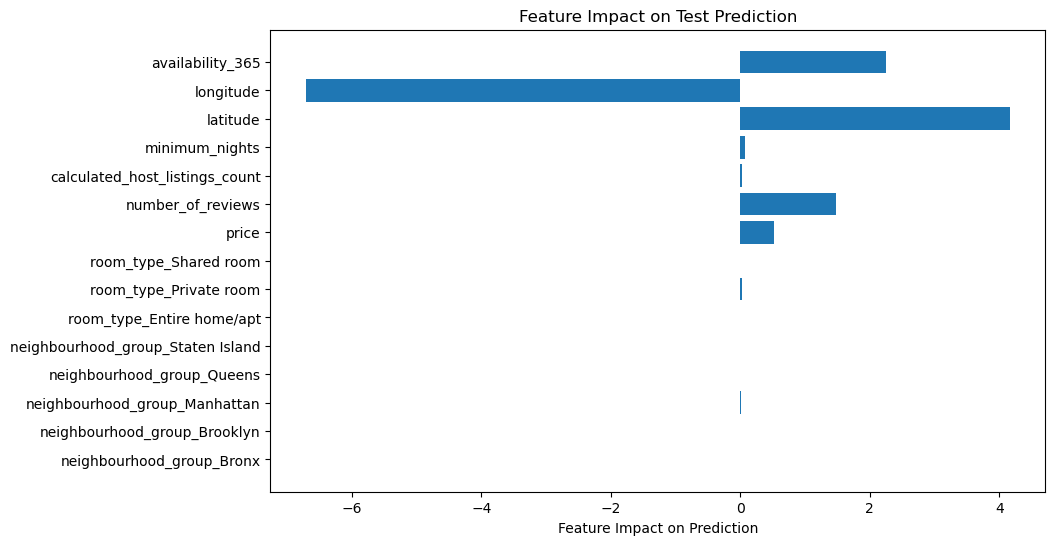

Predicted value: 4.414969563492062


In [45]:
import matplotlib.pyplot as plt
import numpy as np

feature_importance = rf_model.feature_importances_

test_sample = transformed_test_df.iloc[0]  

test_sample_reshaped = test_sample.values.reshape(1, -1)
predicted_value = rf_model.predict(test_sample_reshaped)[0]

feature_impact = feature_importance * test_sample

# Plot the feature impact
plt.figure(figsize=(10, 6))
plt.barh(np.arange(len(feature_impact)), feature_impact, align='center')
plt.yticks(np.arange(len(feature_impact)), transformed_test_df.columns)
plt.xlabel('Feature Impact on Prediction')
plt.title('Feature Impact on Test Prediction')
plt.show()

# Print the prediction and the actual value
print(f"Predicted value: {predicted_value}")

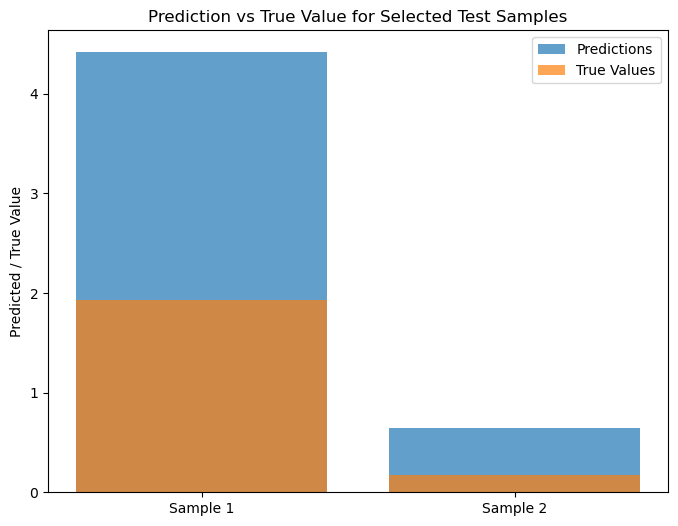

In [50]:
from sklearn.inspection import permutation_importance

test_samples = transformed_test_df.iloc[[0, 1]]  

# Get the corresponding true values
true_values = sampled_y_test.iloc[[0, 1]]

# Get the predictions from the model
predictions = rf_model.predict(test_samples)

# Plot the predictions vs the true values
plt.figure(figsize=(8, 6))
plt.bar(range(len(true_values)), predictions, alpha=0.7, label='Predictions')
plt.bar(range(len(true_values)), true_values, alpha=0.7, label='True Values')
plt.xticks(range(len(true_values)), ['Sample 1', 'Sample 2'])
plt.ylabel('Predicted / True Value')
plt.title('Prediction vs True Value for Selected Test Samples')
plt.legend()
plt.show()

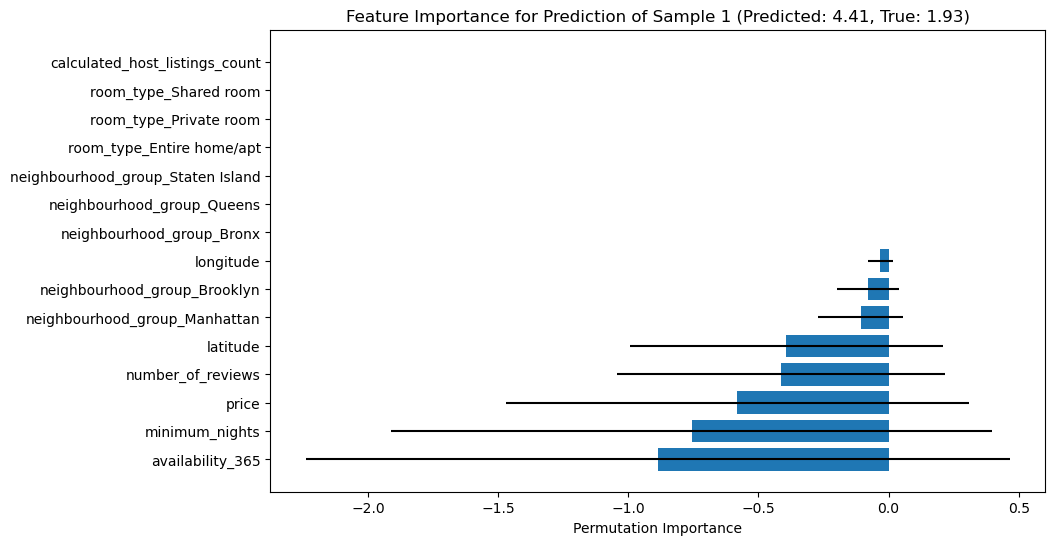

In [48]:
perm_importance = permutation_importance(rf_model, test_samples, true_values, n_repeats=10, random_state=42, n_jobs=-1)

feature_names = transformed_test_df.columns
sorted_idx = perm_importance.importances_mean.argsort()

plt.figure(figsize=(10, 6))
plt.barh(feature_names[sorted_idx], perm_importance.importances_mean[sorted_idx], xerr=perm_importance.importances_std[sorted_idx], align='center')
plt.xlabel('Permutation Importance')
plt.title(f'Feature Importance for Prediction of Sample 1 (Predicted: {predictions[0]:.2f}, True: {true_values.iloc[0]:.2f})')
plt.show()

In [68]:
...

Ellipsis

In [69]:
...

Ellipsis

In [70]:
...

Ellipsis

In [71]:
...

Ellipsis

In [72]:
...

Ellipsis

In [73]:
...

Ellipsis

In [74]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 13. Summary of results <a name="13"></a>
<hr>
rubric={points:12}

Imagine that you want to present the summary of these results to your boss and co-workers. 

**Your tasks:**

1. Create a table summarizing important results. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 
3. Report your final test score along with the metric you used at the top of this notebook in the [Submission instructions section](#si).

<div class="alert alert-warning">
    
Solution_13
    
</div>

_Points:_ 12

_Type your answer here, replacing this text._

In [75]:
...

Ellipsis

In [76]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<br><br>

<!-- BEGIN QUESTION -->

## 14. Your takeaway <a name="15"></a>
<hr>
rubric={points:2}

**Your tasks:**

What is your biggest takeaway from the supervised machine learning material we have learned so far? Please write thoughtful answers.  

<div class="alert alert-warning">
    
Solution_14
    
</div>

_Points:_ 2

<!-- END QUESTION -->

<br><br>

**PLEASE READ BEFORE YOU SUBMIT:** 

When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from "1" will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
4. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 
5. Make sure that the plots and output are rendered properly in your submitted file. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb so that the TAs can view your submission on Gradescope. 

This was a tricky one but you did it! 

![](img/eva-well-done.png)